In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from textblob import TextBlob

In [5]:
df = pd.read_csv("C:/Users/savil/Downloads/drugsCom_raw/drugsComTrain_raw.tsv",sep='\t')

In [6]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
#Columns
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
#Missing values
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### Narative
+ Most of the missing values are condition
+ This implies that most people dont know their condition by name or rather not say

### Question on Drugs
+ How many drugs do we have?

In [10]:
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [11]:
len(df['drugName'].unique().tolist())

3436

In [12]:
# What is the most popular drug?
df['drugName'].value_counts()

Levonorgestrel                                    3657
Etonogestrel                                      3336
Ethinyl estradiol / norethindrone                 2850
Nexplanon                                         2156
Ethinyl estradiol / norgestimate                  2117
                                                  ... 
Acrivastine / pseudoephedrine                        1
Asendin                                              1
Citric acid / simethicone / sodium bicarbonate       1
Hyalgan                                              1
Nizoral Shampoo                                      1
Name: drugName, Length: 3436, dtype: int64

In [14]:
# What is the most popular drug?
# Top 20 Drugs 
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Citalopram                             995
Medroxyprogesterone                    995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

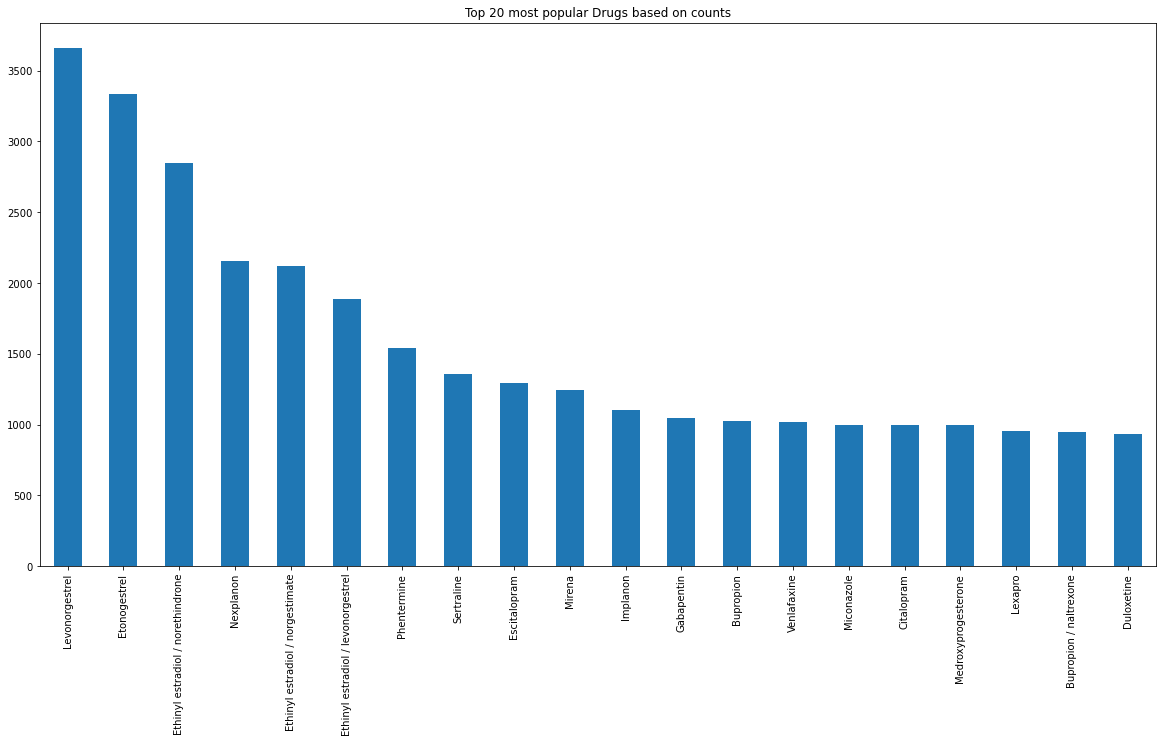

In [15]:
# What is the most popular drug?
# Top 20 Drugs 
# Graph
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 most popular Drugs based on counts")
plt.show()

### Narative
+ Most of the common Drugs are horomnal drugs

In [16]:
# What is the least popular drug?
# Least 20 Drugs 
df['drugName'].value_counts().nsmallest(20)

Conivaptan                                       1
Sulfinpyrazone                                   1
Oxytocin                                         1
Cyklokapron                                      1
Vesanoid                                         1
Hyzine                                           1
Polocaine                                        1
Collagenase                                      1
Flonase Allergy Relief                           1
Zinc gluconate                                   1
Plexion Cleanser                                 1
Ex-Lax Maximum Relief Formula                    1
Pyridoxine                                       1
Ethambutol                                       1
Zioptan                                          1
Acetic acid                                      1
Saizen                                           1
Iohexol                                          1
Acetaminophen / dextromethorphan / doxylamine    1
Ery Pads                       

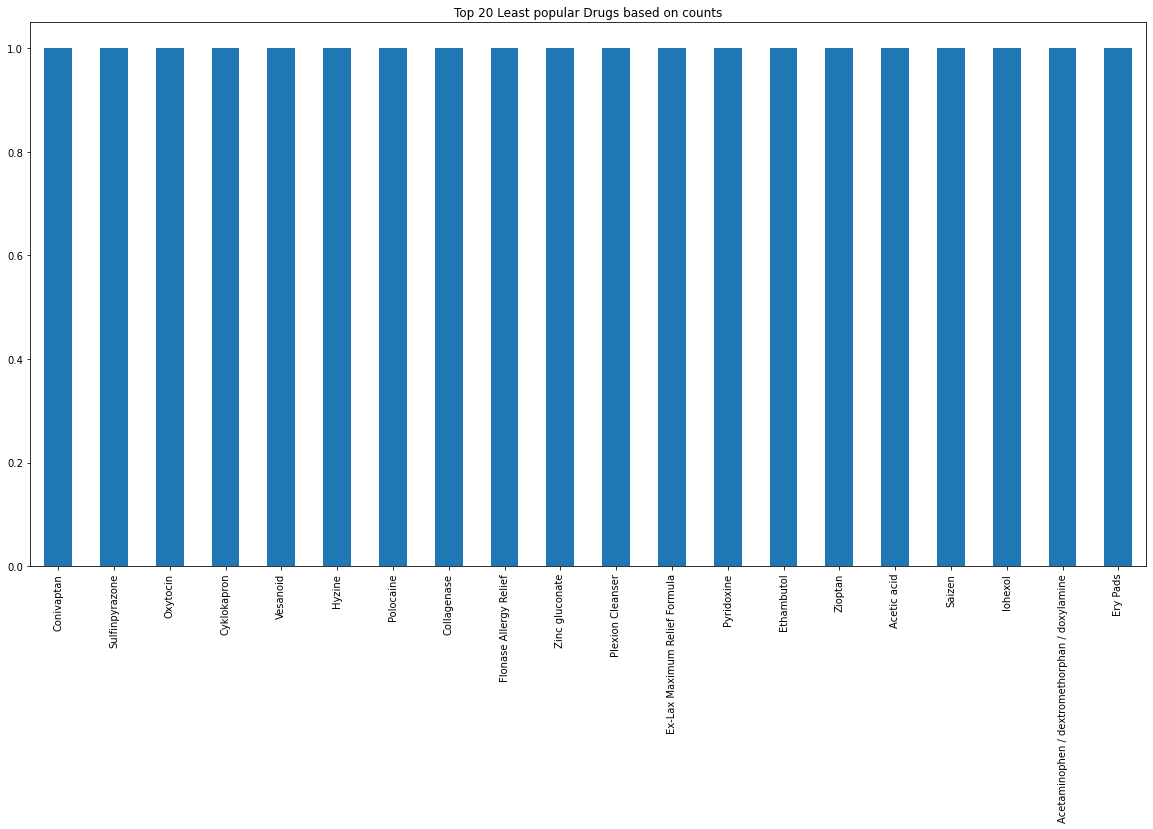

In [17]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')
plt.title("Top 20 Least popular Drugs based on counts")
plt.show()

In [20]:
### What are the groups/Classification of drugs used?

In [21]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
              "caine":"anesthetic",
              "cillin":"antibiotic(penicillins)",
              "mycin":"antibiotic",
              "cycline":"antibiotic",
              "oxacin":"antibiotic",
              "ceph":"antibiotic(cephalosporins)",
              "cef":"antibiotic(cephalosporins)",
              "dine":"h2 blockers (anti-ulcers)",
              "ase":"Thrombolytic (clot buster)",
              "plase":"enzymes (wound debridement)",
              "azepam":"Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)",
              "azine":"Phenothiazine (psychosis, antihistamine)",
              "barbital":"Barbiturate (sedation, anesthesia, insomnia, seizures)",
              "dipine":"Calcium channel blocker",
              "lol":"beta blocker",
              "zolan":"cns depressants",
              "pril":"ace inhibitor",
              "atran":"arb blocker",
              "statins":"lipid-lowering drugs",
              "parin":"anticoagulants",
              "sonc":"corticoasteroid (prednisone)",
              "floxacin":"flouraquinolones (anti-infectives)",
              "pramine":"Tricyclic antidepressants (depression)",
              "ptyline":"Tricyclic antidepressants (depression)",
              "lone":"Corticosteroids (metabolism, inflammation, electolytes, water)",
              "sone":"Corticosteroids (metabolism, inflammation, electolytes, water)",
              "mab":"Monoclonal antibodies (cancer)",
              "micin":"Aminoglycosides (anti-infectives)",
              "mycin":"Aminoglycosides (anti-infectives)",
              "kasin":"Aminoglycosides (anti-infectives)",
              "navir":"Antiviral, protease inhibitors (HIV, Hep C)",
              "oxin":"Cardiac glycoside (CHF, dysrhythmias)",
              "osin":"Alpha blockers (BPH, HTN)",
              "zosin":"Alpha blockers (BPH, HTN)",
              "parin":"Anticoagulant (prevent DVT, PE, MI, stroke)",
              "pril":"ACE inhibitor (diurese for HTN, CHF)",
              "statin":"HMG-COA reductase inhibitors (high cholestorol) Lidid lowering drug",
              "sartan":"ARB angiotensin II blocker (diurese for HTN, CHF)",
              "artan":"ARB angiotensin II blocker (diurese for HTN, CHF)",
              "terol":"Beta 2 agonist / sympathomimetic (asthma, COPD)",
              "terenol":"Beta 2 agonist / sympathomimetic (asthma, COPD)",
              "thiazide":"Thiazide diuretics (HTN, edema)",
              "tidine":"H2 antagoinst (ulcers, acid secretion)",
              "tropin":"Pituitary hormone",
              "vir":"Anti-viral (HIV, Hep C)",
              "vir":"protease inhibitors (HIV, Hep C)",
              "zolam":"Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)",
              "izine":"H1 antagonist (n/v)",
              "lukast":"Leukotriene antagoinst (asthma, bronchitis)",
              "zoline":"Decongestent (nasal congestion)",
              "edrine":"Decongestent (nasal congestion)",
              "pressin":"Pituitary hormone (vasoconstriction, Na in, K out)",
              "calc":"Parathyroid hormone (effect calcium levels)",
              "calci":"Parathyroid hormone (effect calcium levels)",
              "cort":"Corticosteroids (metabolism, inflammation, electolytes, water)",
              "setron":"HT3 antagonist (n/v)",
              "terol":"Bronchodilator",
              "sone":"Corticosteroid",
              "dronate":"Bisphosphonate",
              "prazole":"Protein pump inhibitor, acid reducer",
              "thromycin":"Macrolide antibiotic"}

In [30]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True)
            print(drug_suffix[i])

In [31]:
classify_drug('lukast')

True
Leukotriene antagoinst (asthma, bronchitis)


In [32]:
classify_drug("dine")

True
h2 blockers (anti-ulcers)


In [33]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return(drug_suffix[i])

In [38]:
classify_drug("mycin")

'Aminoglycosides (anti-infectives)'

In [39]:
df["drug_class"] = df["drugName"].apply(classify_drug)

In [42]:
df[["drugName","drug_class"]]

,drugName,drug_class
0,Valsartan,"ARB angiotensin II blocker (diurese for HTN, CHF)"
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,None
161294,Orencia,None
161295,Thyroid desiccated,None


In [43]:
# How many groups of Drug by Class
df['drug_class'].unique().tolist()

['ARB angiotensin II blocker (diurese for HTN, CHF)',
 None,
 'antifungal (except metronidazole)',
 'Tricyclic antidepressants (depression)',
 'Aminoglycosides (anti-infectives)',
 'Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)',
 'Corticosteroids (metabolism, inflammation, electolytes, water)',
 'protease inhibitors (HIV, Hep C)',
 'Alpha blockers (BPH, HTN)',
 'antibiotic',
 'h2 blockers (anti-ulcers)',
 'beta blocker',
 'ACE inhibitor (diurese for HTN, CHF)',
 'Thrombolytic (clot buster)',
 'Leukotriene antagoinst (asthma, bronchitis)',
 'H1 antagonist (n/v)',
 'Monoclonal antibodies (cancer)',
 'Corticosteroid',
 'HMG-COA reductase inhibitors (high cholestorol) Lidid lowering drug',
 'Bisphosphonate',
 'Phenothiazine (psychosis, antihistamine)',
 'antibiotic(penicillins)',
 'Thiazide diuretics (HTN, edema)',
 'HT3 antagonist (n/v)',
 'Pituitary hormone (vasoconstriction, Na in, K out)',
 'Barbiturate (sedation, anesthesia, insomnia, seizures)',
 'Calcium channel 

In [44]:
len(df['drug_class'].unique().tolist())

37

In [47]:
# Which group fo drugs are most common
df['drug_class'].value_counts()

antifungal (except metronidazole)                                      4201
Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)       2588
antibiotic                                                             1806
Aminoglycosides (anti-infectives)                                      1595
h2 blockers (anti-ulcers)                                              1228
protease inhibitors (HIV, Hep C)                                       1106
beta blocker                                                           1063
Tricyclic antidepressants (depression)                                 1054
Monoclonal antibodies (cancer)                                         1052
Corticosteroid                                                          886
Corticosteroids (metabolism, inflammation, electolytes, water)          666
Phenothiazine (psychosis, antihistamine)                                664
ARB angiotensin II blocker (diurese for HTN, CHF)                       560
Decongestent

In [48]:
# Top 20 drugs (By group)
df['drug_class'].value_counts().nlargest(20)

antifungal (except metronidazole)                                      4201
Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)       2588
antibiotic                                                             1806
Aminoglycosides (anti-infectives)                                      1595
h2 blockers (anti-ulcers)                                              1228
protease inhibitors (HIV, Hep C)                                       1106
beta blocker                                                           1063
Tricyclic antidepressants (depression)                                 1054
Monoclonal antibodies (cancer)                                         1052
Corticosteroid                                                          886
Corticosteroids (metabolism, inflammation, electolytes, water)          666
Phenothiazine (psychosis, antihistamine)                                664
ARB angiotensin II blocker (diurese for HTN, CHF)                       560
Decongestent

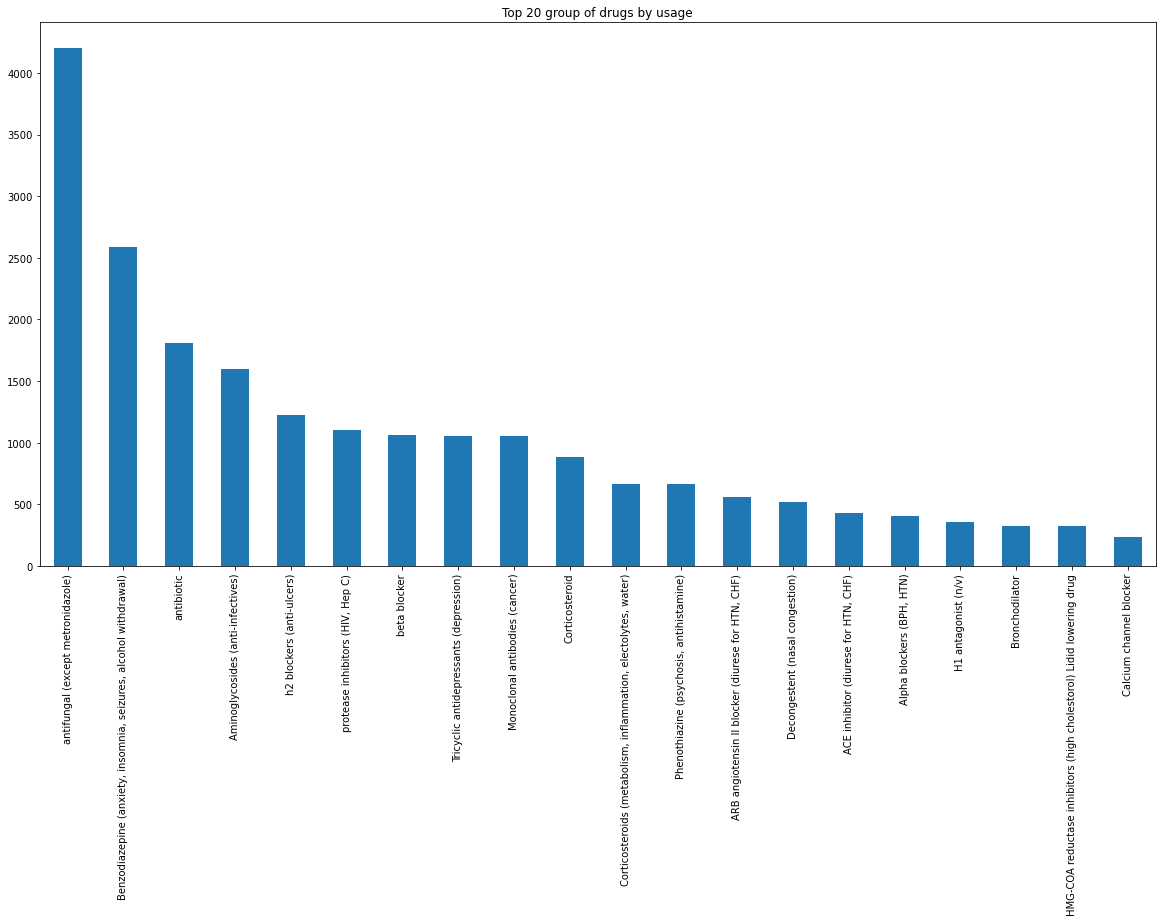

In [51]:
# Top 20 drugs (By group) Vizzz
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 group of drugs by usage")
plt.show()

#### Narative
+ Most common group of drugs are 
- Antifungal
- Antibiotic
- Benzodiazepines
- Aminoglycosides

In [55]:
# Number of conditions
df["condition"].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [56]:
len(df["condition"].unique().tolist())

885

#### Narative
+ 885 different conditions

In [57]:
# Distribution of Conditions
df['condition'].value_counts()

Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
Neurotic Depression                                1
Occipital Neuralgia                                1
34</span> users found this comment helpful.        1
Gastric Cance                                      1
Amyotrophic Lateral Sclerosis                      1
Name: condition, Length: 884, dtype: int64

In [58]:
# Most Common Conditions
df['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

Text(0.5, 1.0, 'Most Common Conditions')

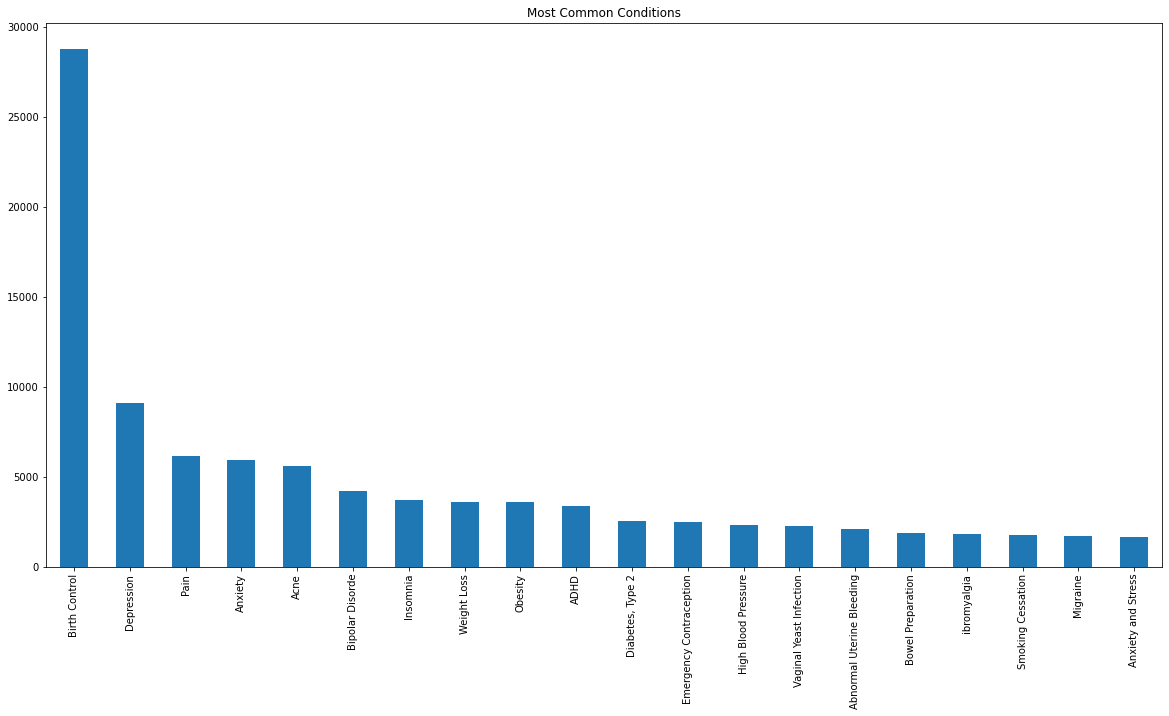

In [60]:
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Most Common Conditions")

### Narative
+ Most common condition is birth control
+ Followed by Depresstion
+ Pain
+ Many mental related illnesses

In [62]:
df['condition'].value_counts().nsmallest(20)

30</span> users found this comment helpful.     1
Upper Limb Spasticity                           1
Paragonimus westermani, Lung Fluke              1
Ramsay Hunt Syndrome                            1
Pseudogout, Prophylaxis                         1
Wilson's Disease                                1
Sepsis                                          1
Organ Transplant, Rejection Reversal            1
Dermatitis Herpeti                              1
Neutropenia                                     1
Tinea Barbae                                    1
Multiple Endocrine Adenomas                     1
145</span> users found this comment helpful.    1
acial Lipoatrophy                               1
Scleroderma                                     1
72</span> users found this comment helpful.     1
54</span> users found this comment helpful.     1
Thyroid Suppression Test                        1
Parkinsonism                                    1
mist (                                          1


Text(0.5, 1.0, 'Least Common Conditions')

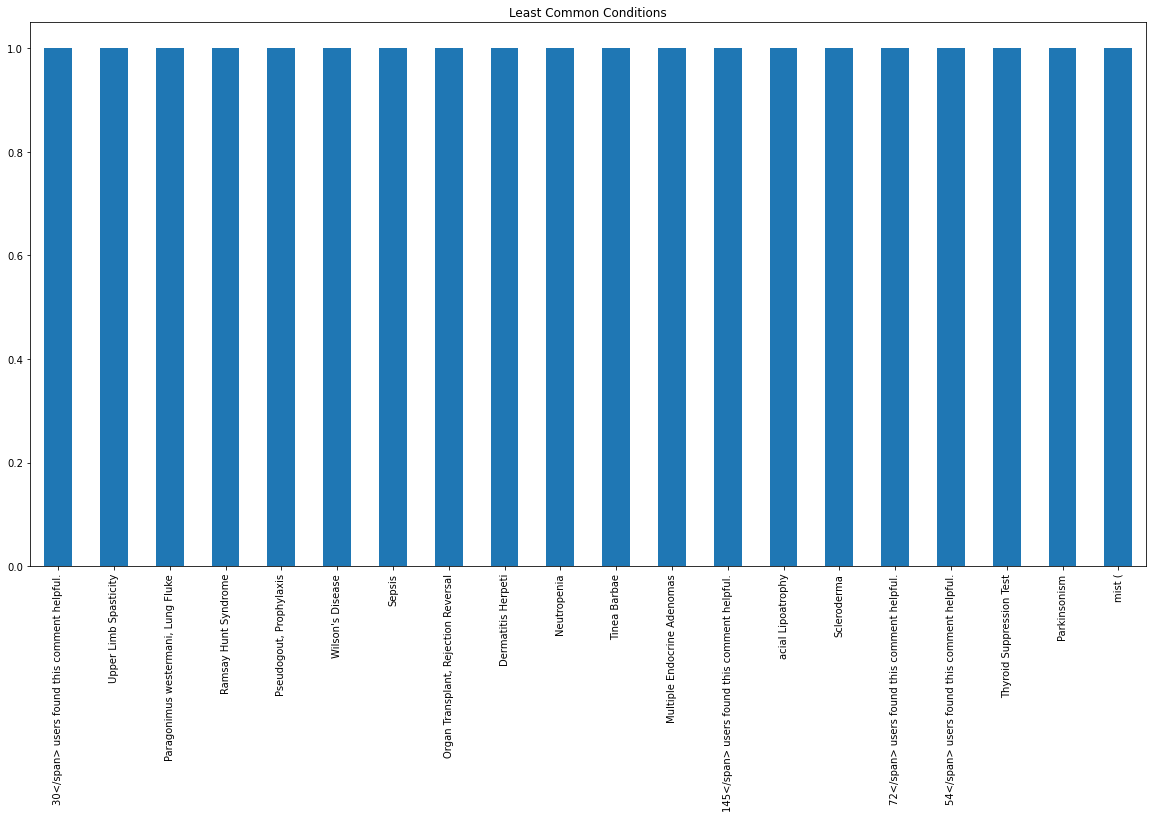

In [61]:
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))
plt.title("Least Common Conditions")

### Questions on Drugs and Conditions
+ How many drugs per condition

In [66]:
# How many drugs per condition (Top 20)
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

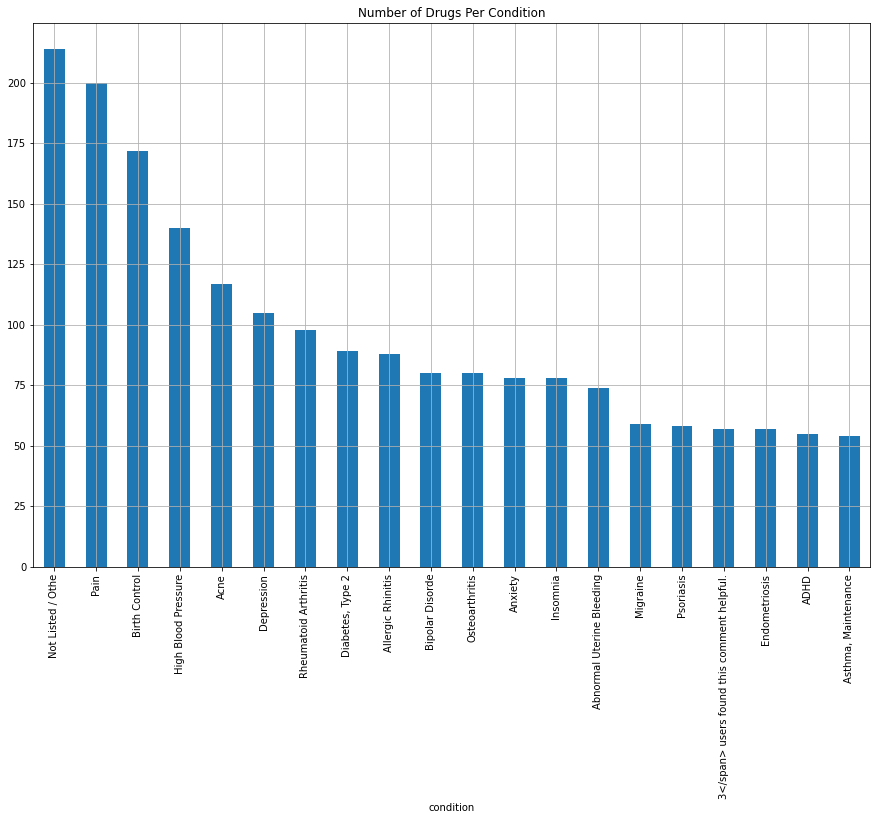

In [69]:
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

#### Narative
+ Pain, Birth Control and HBL have the highest amount of different drugs for their condition

In [71]:
# Distribution of Drugs Per Drug Group based on Size
drug_groups = df.groupby('drug_class').size()

In [72]:
#Conver to DF
type(drug_groups)

pandas.core.series.Series

In [73]:
drug_groups.to_frame()

,0
drug_class,
"ACE inhibitor (diurese for HTN, CHF)",432
"ARB angiotensin II blocker (diurese for HTN, CHF)",560
"Alpha blockers (BPH, HTN)",409
Aminoglycosides (anti-infectives),1595
"Anticoagulant (prevent DVT, PE, MI, stroke)",9
"Antiviral, protease inhibitors (HIV, Hep C)",44
"Barbiturate (sedation, anesthesia, insomnia, seizures)",19
"Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)",2588
"Beta 2 agonist / sympathomimetic (asthma, COPD)",1


In [75]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

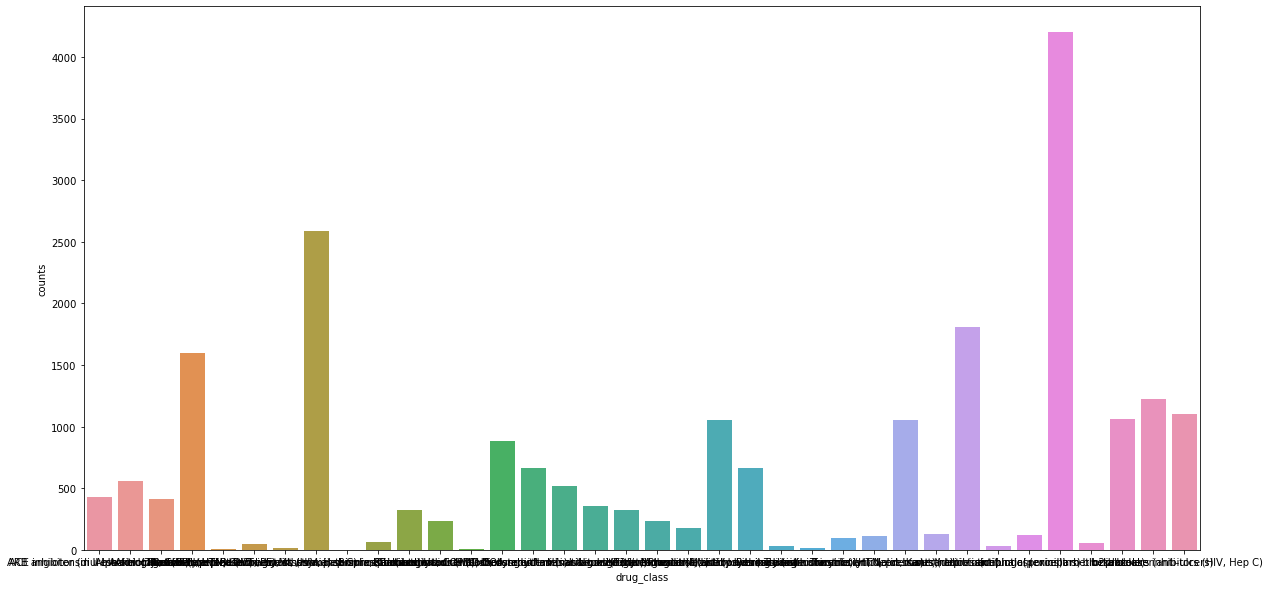

In [77]:
#Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.show()

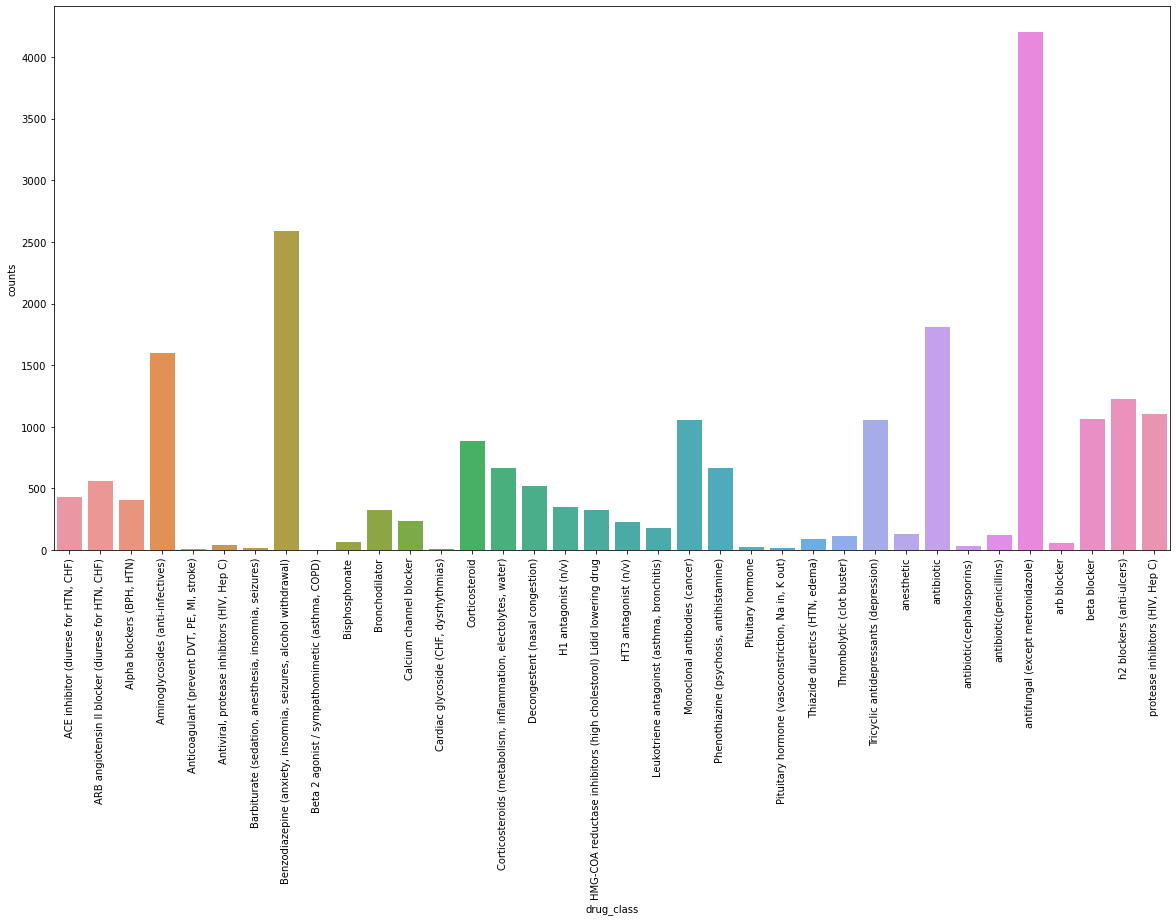

In [84]:
#Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)
plt.show()

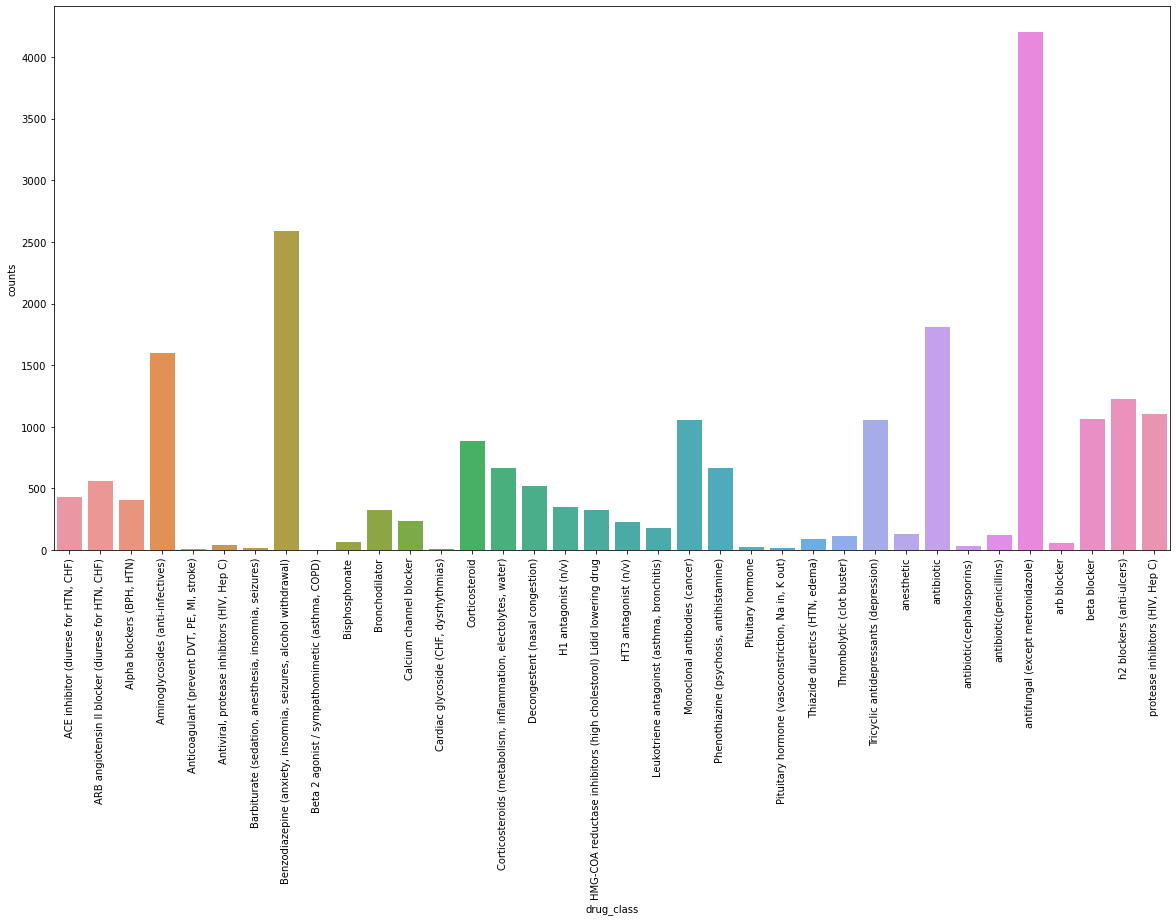

In [87]:
#Seaborn Plot
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.xticks(rotation=90)
plt.show()

### Questions on Ratings
+ Distribution of Rating
+ Average Rating per Count

In [88]:
df['rating']

0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161297, dtype: float64

In [89]:
# Distribution of Rating By Size
df.groupby('rating').size()

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

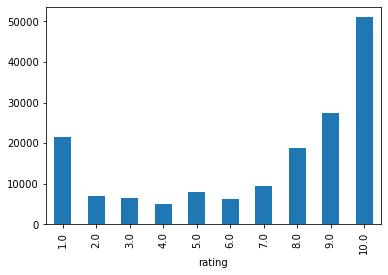

In [90]:
df.groupby('rating').size().plot(kind='bar')

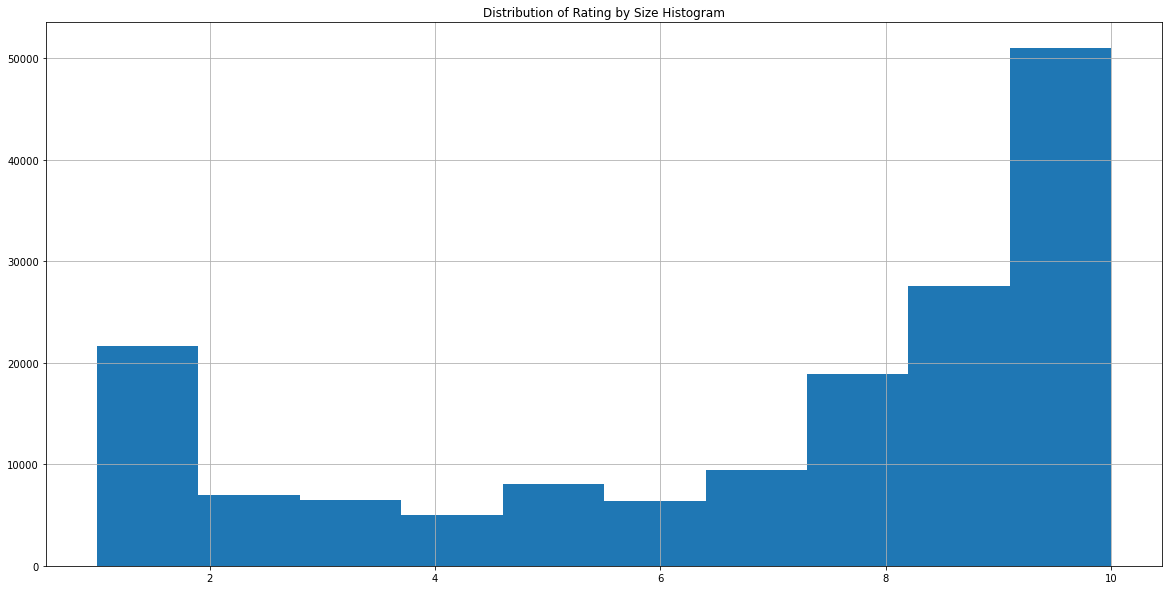

In [91]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distribution of Rating by Size Histogram")
plt.show()

### Narative
+ Most people gave a high rating
+ Even an extreme low rating is somewhat common

In [96]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())

In [97]:
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

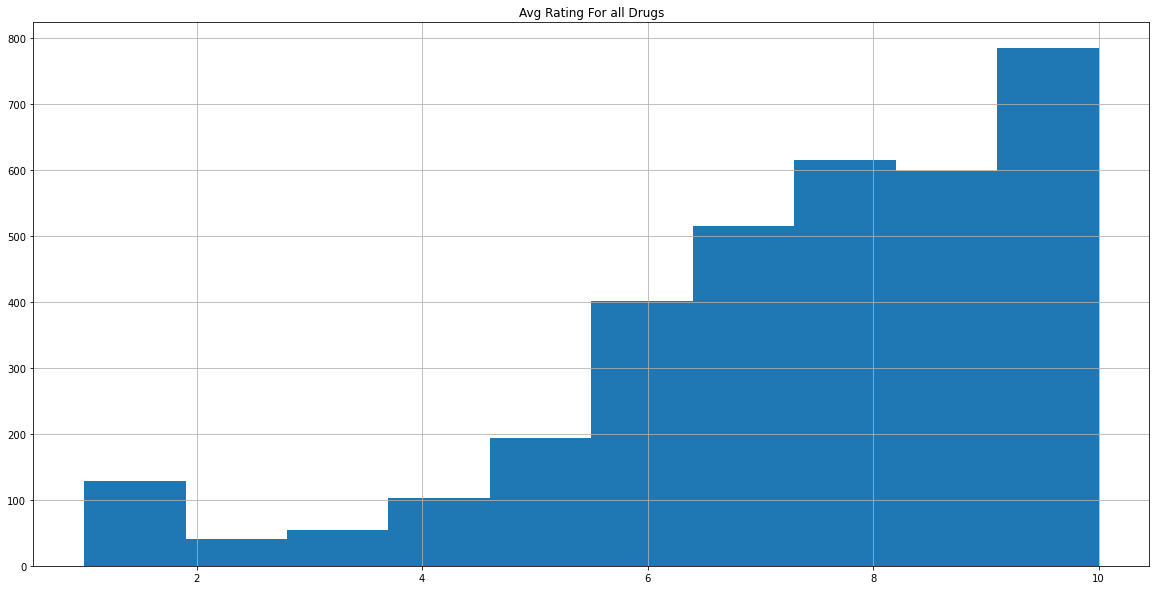

In [99]:
# Avg Rating for all the drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Avg Rating For all Drugs")
plt.show()

In [100]:
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())

In [101]:
avg_rating_per_drug_class

drug_class
ACE inhibitor (diurese for HTN, CHF)                                    5.759259
ARB angiotensin II blocker (diurese for HTN, CHF)                       6.464286
Alpha blockers (BPH, HTN)                                               6.469438
Aminoglycosides (anti-infectives)                                       6.739185
Anticoagulant (prevent DVT, PE, MI, stroke)                             9.222222
Antiviral, protease inhibitors (HIV, Hep C)                             8.159091
Barbiturate (sedation, anesthesia, insomnia, seizures)                  8.894737
Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)        8.546754
Beta 2 agonist / sympathomimetic (asthma, COPD)                        10.000000
Bisphosphonate                                                          3.888889
Bronchodilator                                                          6.913313
Calcium channel blocker                                                 5.725322
Cardiac glycoside

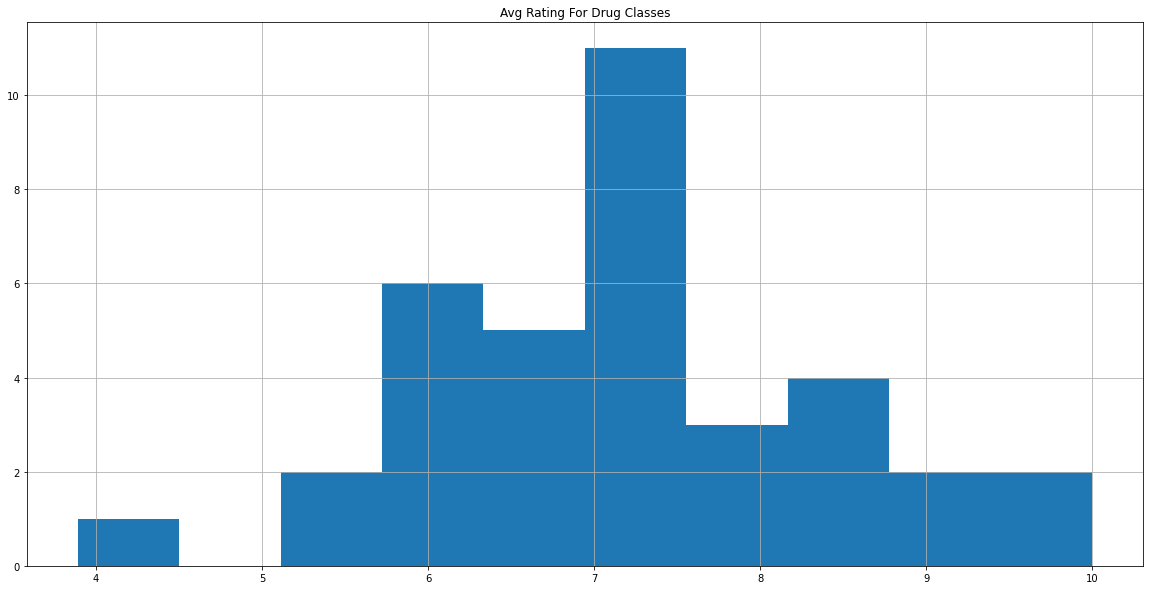

In [102]:
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Avg Rating For Drug Classes")
plt.show()

In [104]:
# Groups of Drugs have the highest average rating
avg_rating_per_drug_class.nlargest(20)

drug_class
Beta 2 agonist / sympathomimetic (asthma, COPD)                     10.000000
Pituitary hormone (vasoconstriction, Na in, K out)                   9.538462
Anticoagulant (prevent DVT, PE, MI, stroke)                          9.222222
Barbiturate (sedation, anesthesia, insomnia, seizures)               8.894737
Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)     8.546754
Pituitary hormone                                                    8.500000
protease inhibitors (HIV, Hep C)                                     8.447559
HT3 antagonist (n/v)                                                 8.246753
Antiviral, protease inhibitors (HIV, Hep C)                          8.159091
Tricyclic antidepressants (depression)                               7.873814
beta blocker                                                         7.581373
Corticosteroid                                                       7.477427
Decongestent (nasal congestion)                      

In [105]:
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

# Sentiment Analysis

In [106]:
# How genuine id the review?
df['review']

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [124]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [125]:
# Text fucntion
get_sentiment("I don't mind apples")

0.0

In [126]:
get_sentiment_label("I love apples")

'positive'

In [127]:
df['sentiment'] = df['review'].apply(get_sentiment)

In [128]:
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [129]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [130]:
# How many positive negative and neutral reviews?
df['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

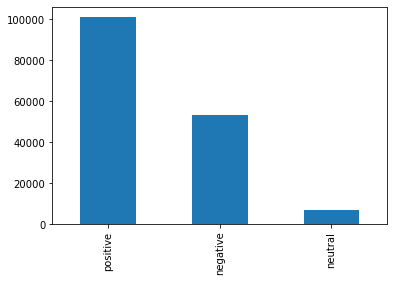

In [131]:
df['sentiment_label'].value_counts().plot(kind='bar')

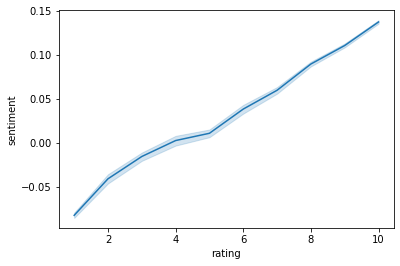

In [132]:
# Correlation between our sentiment and rating
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

# Narrative
+ Rating and Sentiment both increases together

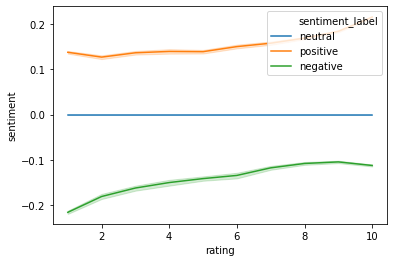

In [133]:
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')

# How many reviews are genuine as compared with ratings
+ genuine good rating = Postivie + 10-6
+ genuine bad rating = Negative + 4-1


In [138]:
good_review = df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')]

In [137]:
bad_review = df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')]

In [139]:
good_review.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazole),0.074107,positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,positive


In [143]:
good_review.iloc[0]['review']

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

#### Questions on UsefulCount
+ Number of users who found reviews useful
+ Top useful count by drugs / class
+ Best drugs based on useful count

In [145]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [147]:
# Top Drugs Per usefulcount
df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64

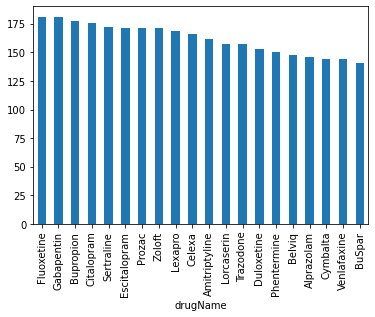

In [148]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')

In [149]:
# Most useful drug class
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)

drug_class
Benzodiazepine (anxiety, insomnia, seizures, alcohol withdrawal)       198
Tricyclic antidepressants (depression)                                 183
h2 blockers (anti-ulcers)                                              147
antifungal (except metronidazole)                                      139
Monoclonal antibodies (cancer)                                         131
ARB angiotensin II blocker (diurese for HTN, CHF)                      129
beta blocker                                                           127
HMG-COA reductase inhibitors (high cholestorol) Lidid lowering drug    122
Alpha blockers (BPH, HTN)                                              119
ACE inhibitor (diurese for HTN, CHF)                                   111
antibiotic                                                             111
Calcium channel blocker                                                108
Aminoglycosides (anti-infectives)                                       98
Corticosteroid

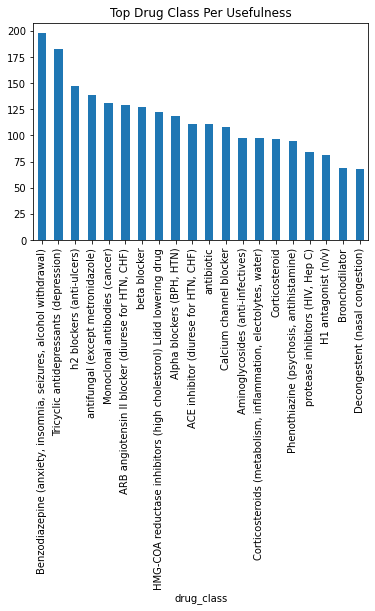

In [150]:
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title("Top Drug Class Per Usefulness")
plt.show()

In [152]:
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20)

drug_class
Beta 2 agonist / sympathomimetic (asthma, COPD)            1
Anticoagulant (prevent DVT, PE, MI, stroke)                5
Cardiac glycoside (CHF, dysrhythmias)                     10
Pituitary hormone (vasoconstriction, Na in, K out)        10
Barbiturate (sedation, anesthesia, insomnia, seizures)    16
Pituitary hormone                                         16
Antiviral, protease inhibitors (HIV, Hep C)               20
antibiotic(cephalosporins)                                20
arb blocker                                               44
anesthetic                                                47
HT3 antagonist (n/v)                                      51
Bisphosphonate                                            53
Thrombolytic (clot buster)                                59
antibiotic(penicillins)                                   60
Thiazide diuretics (HTN, edema)                           62
Leukotriene antagoinst (asthma, bronchitis)               66
Decongestent 

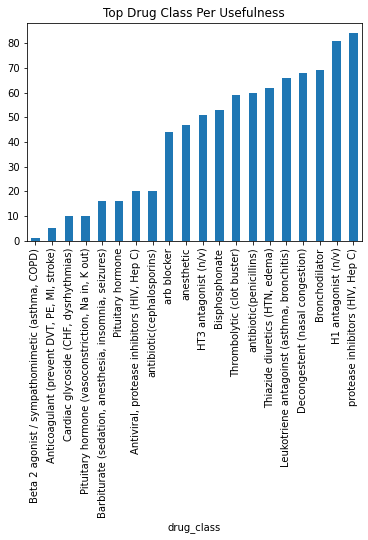

In [151]:
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')
plt.title("Top Drug Class Per Usefulness")
plt.show()

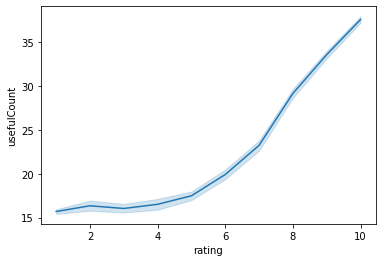

In [153]:
# Correlation between rating and useful count
sns.lineplot(data=df,x='rating',y='usefulCount')

# Narrative
+ Clear correlation between rating and usefulness 

In [154]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class', 'sentiment', 'sentiment_label'],
      dtype='object')

In [155]:
# Rating per year
df.groupby('date')['rating'].size()

date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

In [156]:
df.groupby('date')['rating'].mean()

date
April 1, 2008        8.285714
April 1, 2009        7.666667
April 1, 2010        7.812500
April 1, 2011        8.583333
April 1, 2012        9.238095
                       ...   
September 9, 2013    8.295455
September 9, 2014    8.800000
September 9, 2015    5.733333
September 9, 2016    6.777778
September 9, 2017    5.127273
Name: rating, Length: 3579, dtype: float64

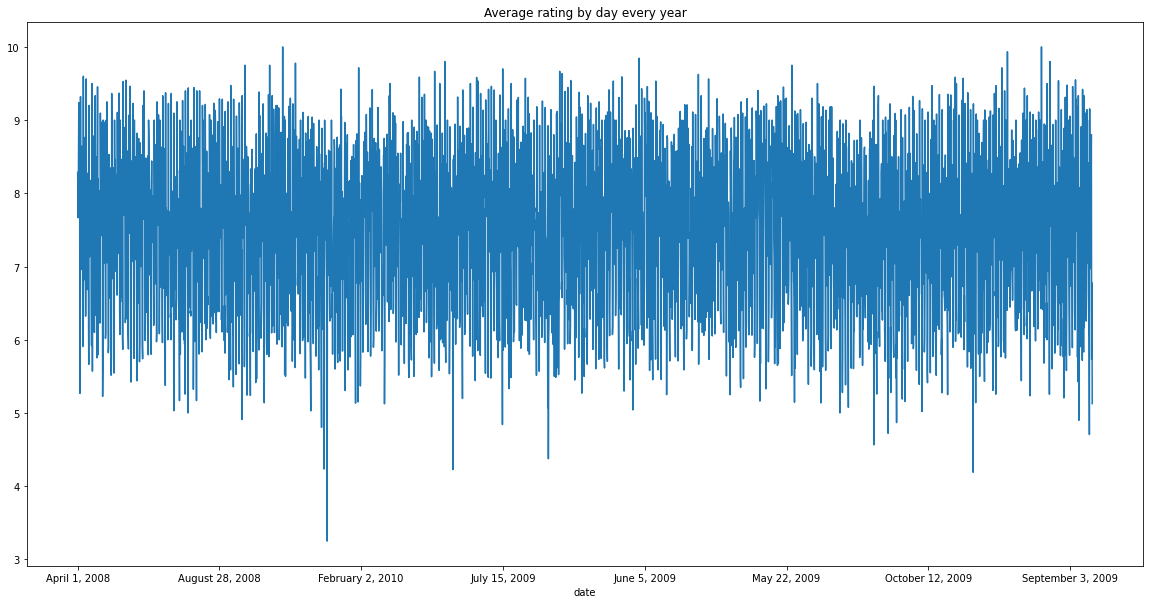

In [159]:
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average rating by day every year")
plt.show()

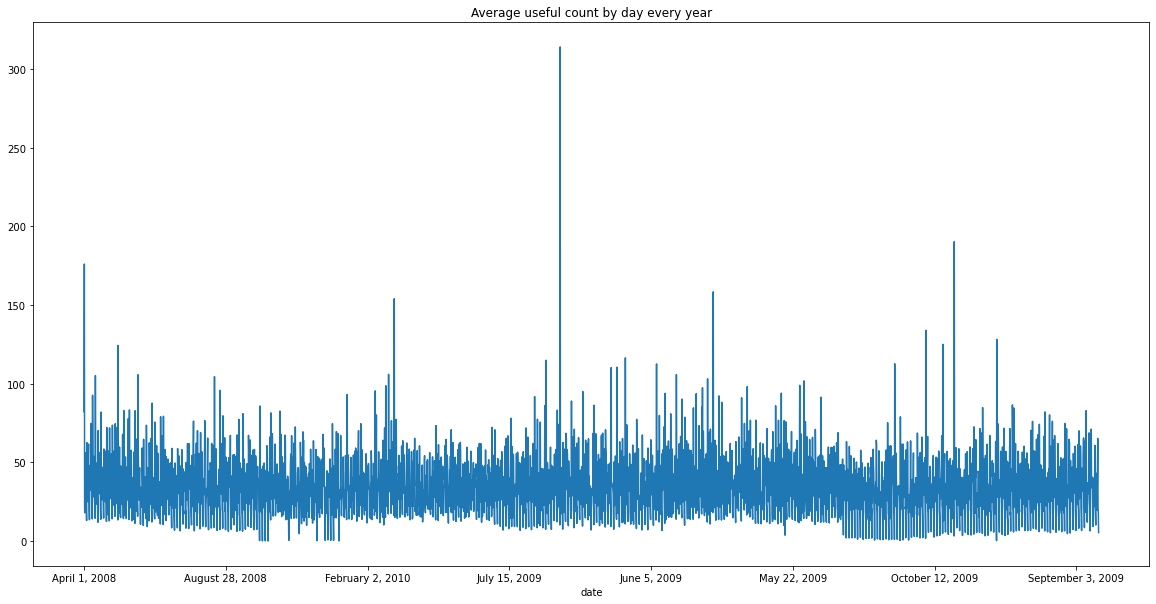

In [160]:
df.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Average useful count by day every year")
plt.show()

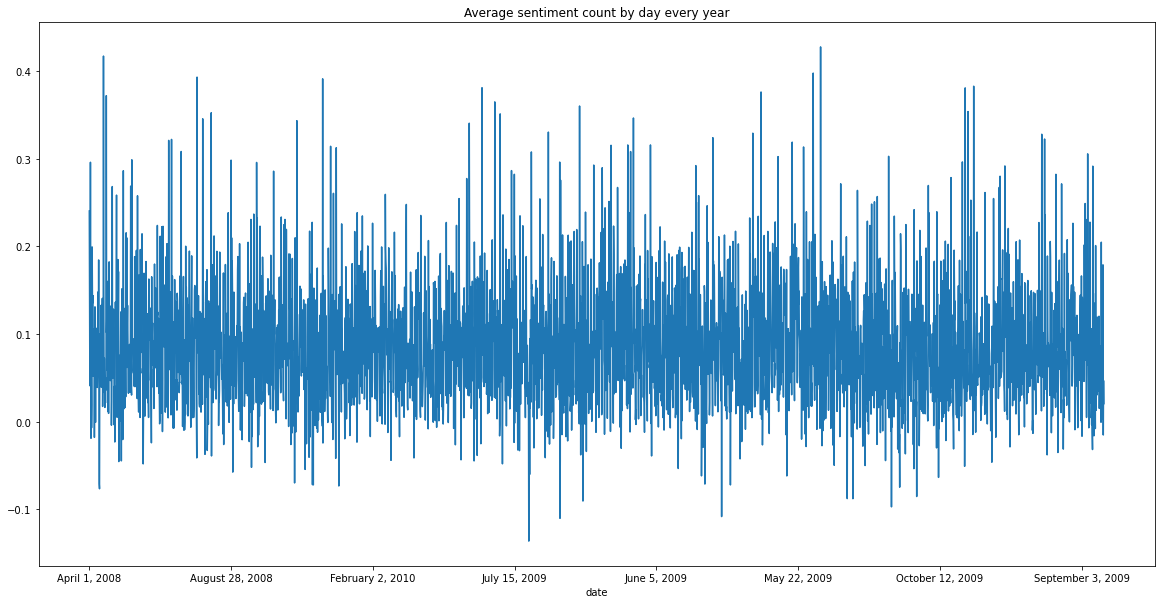

In [161]:
df.groupby('date')['sentiment'].mean().plot(figsize=(20,10))
plt.title("Average sentiment count by day every year")
plt.show()

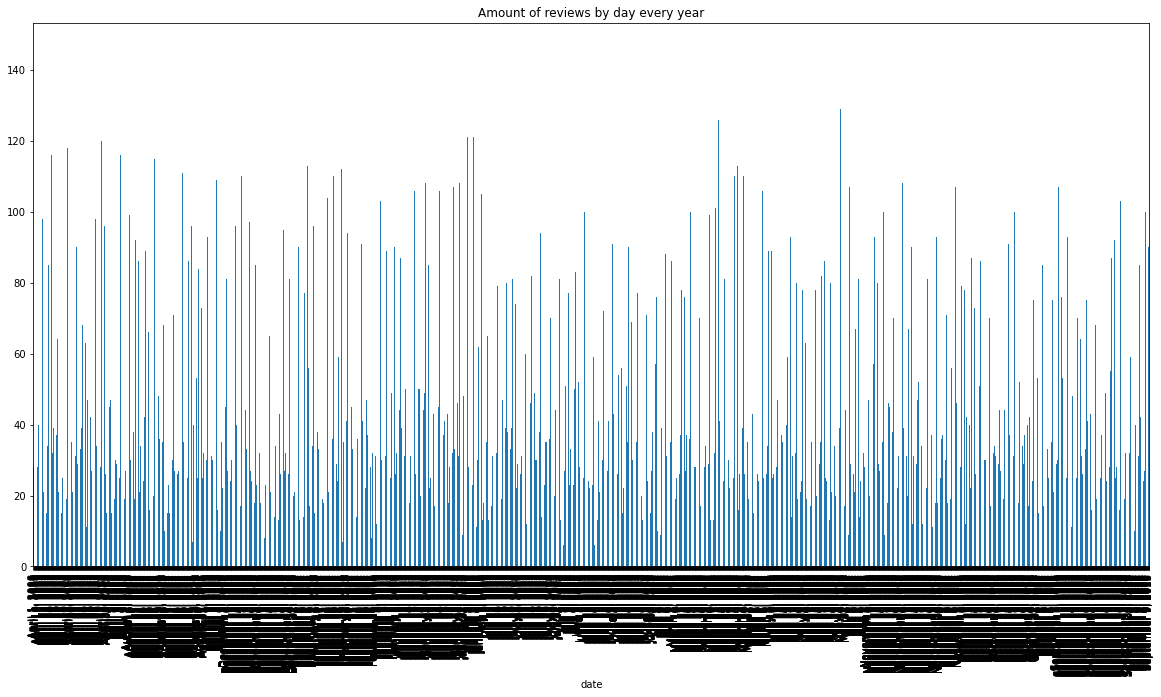

In [165]:
df.groupby('date')['review'].size().plot(kind='bar',figsize=(20,10))
plt.title("Amount of reviews by day every year")
plt.show()

In [168]:
grouped_date = df.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})

In [169]:
grouped_date

,rating,usefulCount,review
date,,,
"April 1, 2008",8.285714,2303,28
"April 1, 2009",7.666667,3698,21
"April 1, 2010",7.812500,342,16
"April 1, 2011",8.583333,216,12
"April 1, 2012",9.238095,1178,21
...,...,...,...
"September 9, 2013",8.295455,1941,44
"September 9, 2014",8.800000,2935,45
"September 9, 2015",5.733333,1901,90


In [170]:
grouped_date.index

Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2011',
       'April 1, 2012', 'April 1, 2013', 'April 1, 2014', 'April 1, 2015',
       'April 1, 2016', 'April 1, 2017',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3579)

In [171]:
grouped_date['date'] = grouped_date.index

In [172]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])

In [173]:
grouped_date = grouped_date.set_index('date')

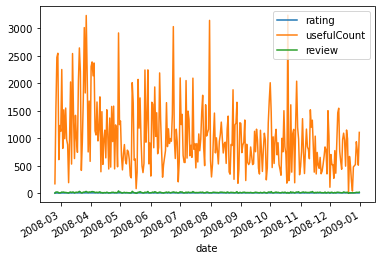

In [174]:
# Select particular date 
grouped_date['2008'].plot()

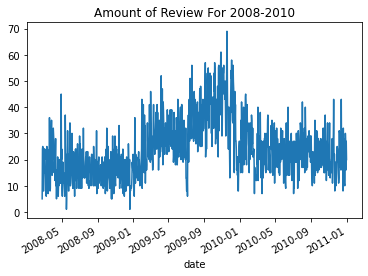

In [178]:
# Amount of review from 2008
grouped_date['2008':'2010']['review'].plot()
plt.title('Amount of Review For 2008-2010')
plt.show()

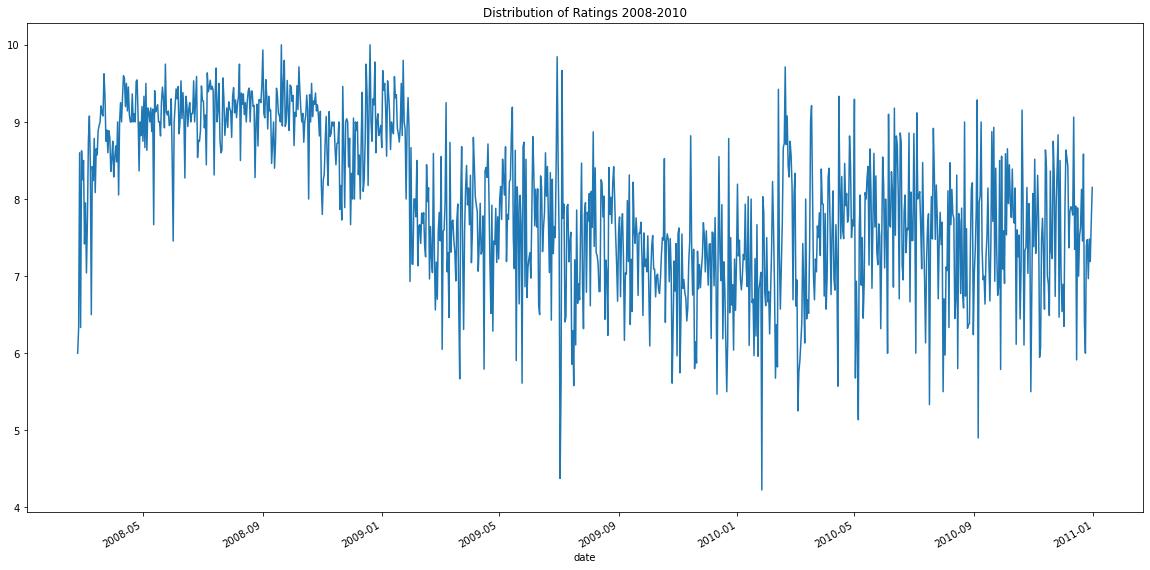

In [181]:
grouped_date['2008':'2010']['rating'].plot(figsize=(20,10))
plt.title('Distribution of Ratings 2008-2010')
plt.show()

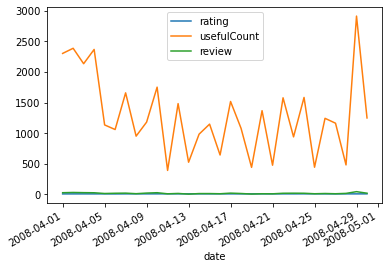

In [182]:
grouped_date['2008-04'].plot()